Integrantes:

*   Eddy André Yupanqui Apolinario ......... 20211741
*   Camila Yvana Zevallos Zamudio ......... 20210754

Cuenca Camaná / Cuenca Madre de Dios

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%%capture
!pip install netcdf4
!pip install geopandas
!pip install rioxarray

In [ ]:
import matplotlib
import calendar
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [ ]:
import xarray as xr
import pandas as pd
import numpy as np
import rioxarray
from geopandas import read_file as gpd_read_file

Promedio de media mensual precipitacion

In [ ]:
pisco = xr.open_dataset("/content/drive/MyDrive/Colab Notebooks/TP2/PISCOp.nc")
pisco=pisco.rename({"T":"time","Y":"latitude","X":"longitude"})
pisco

<xarray.Dataset>
Dimensions:    (time: 13149, latitude: 198, longitude: 133)
Coordinates:
  * time       (time) datetime64[ns] 1981-01-01T12:00:00 ... 2016-12-31T12:00:00
  * latitude   (latitude) float32 0.95 0.85 0.75 0.65 ... -18.55 -18.65 -18.75
  * longitude  (longitude) float32 -81.25 -81.15 -81.05 ... -68.25 -68.15 -68.05
Data variables:
    Prec       (time, latitude, longitude) float32 ...

In [ ]:
pisco['time'] = pd.to_datetime(pisco['time'])
pisco = pisco.resample(time='M').mean()
pisco= pisco.sel(time=slice('1981-01-01T12:00:00.000000000','2010-12-31T12:00:00.000000000'))
pisco

<xarray.Dataset>
Dimensions:    (latitude: 198, longitude: 133, time: 360)
Coordinates:
  * latitude   (latitude) float32 0.95 0.85 0.75 0.65 ... -18.55 -18.65 -18.75
  * longitude  (longitude) float32 -81.25 -81.15 -81.05 ... -68.25 -68.15 -68.05
  * time       (time) datetime64[ns] 1981-01-31 1981-02-28 ... 2010-12-31
Data variables:
    Prec       (time, latitude, longitude) float32 nan nan nan ... 0.7186 0.8582

promedio de temperatura minima mensual




In [ ]:
pisco_tm = xr.open_dataset("/content/drive/MyDrive/Colab Notebooks/TP2/PISCOdtn_v1.1.nc")
pisco_tm

<xarray.Dataset>
Dimensions:    (longitude: 145, latitude: 202, time: 13149)
Coordinates:
  * longitude  (longitude) float64 -81.45 -81.35 -81.25 ... -67.25 -67.15 -67.05
  * latitude   (latitude) float64 1.35 1.25 1.15 1.05 ... -18.55 -18.65 -18.75
  * time       (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2016-12-31
Data variables:
    tn         (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    history:      Mon Nov 05 08:22:37 2018: cdo -r settaxis,1981-01-01,00:00:...
    created_by:   R, packages ncdf4 and raster (version 2.6-7)
    date:         2018-09-28 14:31:17
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

In [ ]:
pisco_tm['time'] = pd.to_datetime(pisco_tm['time'])
pisco_tm_mensual = pisco_tm.resample(time='M').mean()
pisco_tm_mensual= pisco_tm_mensual.sel(time=slice('1981-01-01T12:00:00.000000000','2010-12-31T12:00:00.000000000'))
pisco_tm_mensual

<xarray.Dataset>
Dimensions:    (longitude: 145, latitude: 202, time: 360)
Coordinates:
  * longitude  (longitude) float64 -81.45 -81.35 -81.25 ... -67.25 -67.15 -67.05
  * latitude   (latitude) float64 1.35 1.25 1.15 1.05 ... -18.55 -18.65 -18.75
  * time       (time) datetime64[ns] 1981-01-31 1981-02-28 ... 2010-12-31
Data variables:
    tn         (time, latitude, longitude) float32 nan nan nan ... 2.56 3.107
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    history:      Mon Nov 05 08:22:37 2018: cdo -r settaxis,1981-01-01,00:00:...
    created_by:   R, packages ncdf4 and raster (version 2.6-7)
    date:         2018-09-28 14:31:17
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

promedio de temperatura maxima mensual

In [ ]:
pisco_tx = xr.open_dataset("/content/drive/MyDrive/Colab Notebooks/TP2/PISCOdtx_v1.1.nc")
pisco_tx

<xarray.Dataset>
Dimensions:    (longitude: 145, latitude: 202, time: 13149)
Coordinates:
  * longitude  (longitude) float64 -81.45 -81.35 -81.25 ... -67.25 -67.15 -67.05
  * latitude   (latitude) float64 1.35 1.25 1.15 1.05 ... -18.55 -18.65 -18.75
  * time       (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2016-12-31
Data variables:
    tx         (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    history:      Mon Nov 05 08:23:44 2018: cdo -r settaxis,1981-01-01,00:00:...
    created_by:   R, packages ncdf4 and raster (version 2.6-7)
    date:         2018-09-28 14:31:18
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

In [ ]:
pisco_tx['time'] = pd.to_datetime(pisco_tx['time'])
promedio_tx_mensual = pisco_tx.resample(time='M').mean()
promedio_tx_mensual= promedio_tx_mensual.sel(time=slice('1981-01-01T12:00:00.000000000','2010-12-31T12:00:00.000000000'))
promedio_tx_mensual

<xarray.Dataset>
Dimensions:    (longitude: 145, latitude: 202, time: 360)
Coordinates:
  * longitude  (longitude) float64 -81.45 -81.35 -81.25 ... -67.25 -67.15 -67.05
  * latitude   (latitude) float64 1.35 1.25 1.15 1.05 ... -18.55 -18.65 -18.75
  * time       (time) datetime64[ns] 1981-01-31 1981-02-28 ... 2010-12-31
Data variables:
    tx         (time, latitude, longitude) float32 nan nan nan ... 15.33 13.34
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    history:      Mon Nov 05 08:23:44 2018: cdo -r settaxis,1981-01-01,00:00:...
    created_by:   R, packages ncdf4 and raster (version 2.6-7)
    date:         2018-09-28 14:31:18
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

In [ ]:
#Ahora Sacamos promedio de la Tmax y Tmin
Combinacion_datos = xr.merge([pisco_tm_mensual, promedio_tx_mensual])
promedio = (pisco_tm_mensual["tn"] + promedio_tx_mensual["tx"]) / 2
dataset_combinado = xr.Dataset({'Tpro': promedio})
dataset_combinado

<xarray.Dataset>
Dimensions:    (longitude: 145, latitude: 202, time: 360)
Coordinates:
  * longitude  (longitude) float64 -81.45 -81.35 -81.25 ... -67.25 -67.15 -67.05
  * latitude   (latitude) float64 1.35 1.25 1.15 1.05 ... -18.55 -18.65 -18.75
  * time       (time) datetime64[ns] 1981-01-31 1981-02-28 ... 2010-12-31
Data variables:
    Tpro       (time, latitude, longitude) float32 nan nan nan ... 8.944 8.223

In [ ]:
#Delimitamos solo un Area Tempreatura promedio
max_lat = -17.5
min_lat = -13.5
max_lon = -70.8
min_lon = -72.8
dataset_combinado = dataset_combinado.assign_coords(latitude=dataset_combinado.latitude, longitude=dataset_combinado.longitude)
dataset_delimitado_Tpro_correjir = dataset_combinado.sel(latitude=slice(min_lat, max_lat), longitude=slice(min_lon, max_lon))
dataset_delimitado_Tpro = dataset_delimitado_Tpro_correjir.fillna(0)
dataset_delimitado_Tpro

<xarray.Dataset>
Dimensions:    (time: 360, latitude: 40, longitude: 20)
Coordinates:
  * longitude  (longitude) float64 -72.75 -72.65 -72.55 ... -71.05 -70.95 -70.85
  * latitude   (latitude) float64 -13.55 -13.65 -13.75 ... -17.25 -17.35 -17.45
  * time       (time) datetime64[ns] 1981-01-31 1981-02-28 ... 2010-12-31
Data variables:
    Tpro       (time, latitude, longitude) float32 15.97 16.79 ... 20.41 20.16

In [ ]:
#Ahora preparamos precipitacion
Mismo_datos = xr.merge([pisco])
promedio_1 = (Mismo_datos["Prec"] ) / 1
promedio_meses = xr.Dataset({'Prec': promedio_1})
promedio_meses

<xarray.Dataset>
Dimensions:    (latitude: 198, longitude: 133, time: 360)
Coordinates:
  * latitude   (latitude) float32 0.95 0.85 0.75 0.65 ... -18.55 -18.65 -18.75
  * longitude  (longitude) float32 -81.25 -81.15 -81.05 ... -68.25 -68.15 -68.05
  * time       (time) datetime64[ns] 1981-01-31 1981-02-28 ... 2010-12-31
Data variables:
    Prec       (time, latitude, longitude) float32 nan nan nan ... 0.7186 0.8582

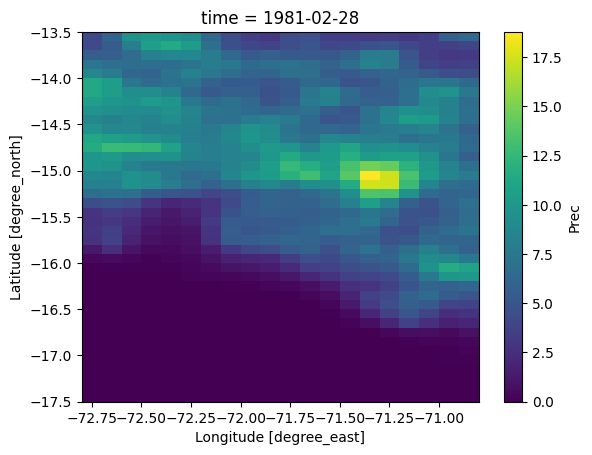

In [ ]:
#Delimitamos solo un Area precipitacion
max_lat = -17.5
min_lat = -13.5
max_lon = -70.8
min_lon = -72.8
promedio_meses = promedio_meses.assign_coords(latitude=promedio_meses.latitude, longitude=promedio_meses.longitude)
promedio_meses_Prec_filled = promedio_meses.sel(latitude=slice(min_lat, max_lat), longitude=slice(min_lon, max_lon))
promedio_meses_Prec = promedio_meses_Prec_filled.fillna(0)
promedio_meses_Prec.Prec[1].plot()

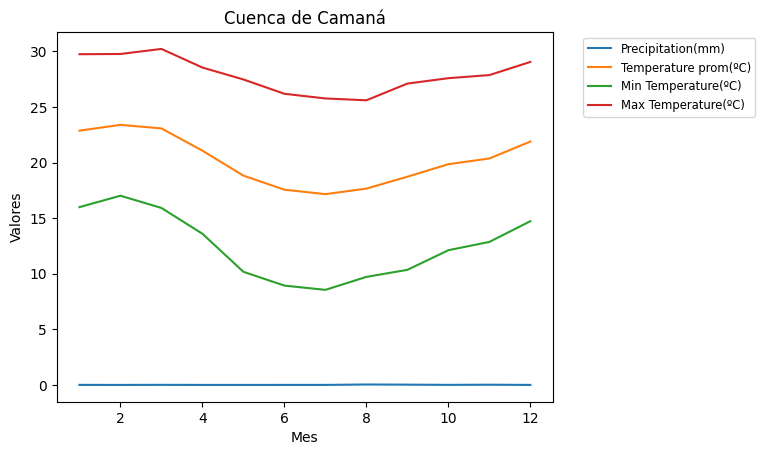

In [ ]:
#Tendencias de las variables termopluviométricas (precipitación, temperatura máxima, temperatura media y temperatura mínima), para 2 micuencas de Peru.
#Cuenca de Camanà
promedio_meses=promedio_meses.sel(time=slice('1981-01-01T12:00:00.000000000','1981-12-31T12:00:00.000000000'))
PISCOt_d =promedio_meses.Prec.groupby(promedio_meses.time.dt.month)
Imagen_pp=PISCOt_d.mean(dim="time").isel(latitude=178, longitude=90).plot(label='Precipitation(mm)')

dataset_combinado=dataset_combinado.sel(time=slice('1981-01-01T12:00:00.000000000','1981-12-31T12:00:00.000000000'))
PISCOt_Tpro =dataset_combinado.Tpro.groupby(dataset_combinado.time.dt.month)
Imagen_Tpro=PISCOt_Tpro.mean(dim="time").isel(latitude=178, longitude=90).plot(label='Temperature prom(ºC)')

pisco_tm_mensual=pisco_tm_mensual.sel(time=slice('1981-01-01T12:00:00.000000000','1981-12-31T12:00:00.000000000'))
pisco_tm_mensual =pisco_tm_mensual.tn.groupby(pisco_tm_mensual.time.dt.month)
Imagen_Tn=pisco_tm_mensual.mean(dim="time").isel(latitude=178, longitude=90).plot(label='Min Temperature(ºC)')

promedio_tx_mensual=promedio_tx_mensual.sel(time=slice('1981-01-01T12:00:00.000000000','1981-12-31T12:00:00.000000000'))
PISCOt_Tx =promedio_tx_mensual.tx.groupby(promedio_tx_mensual.time.dt.month)
Imagen_Tx=PISCOt_Tx.mean(dim="time").isel(latitude=178, longitude=90).plot(label='Max Temperature(ºC)')

plt.xlabel('Mes')
plt.ylabel('Valores')
plt.title('Cuenca de Camaná')
plt.legend(fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left')

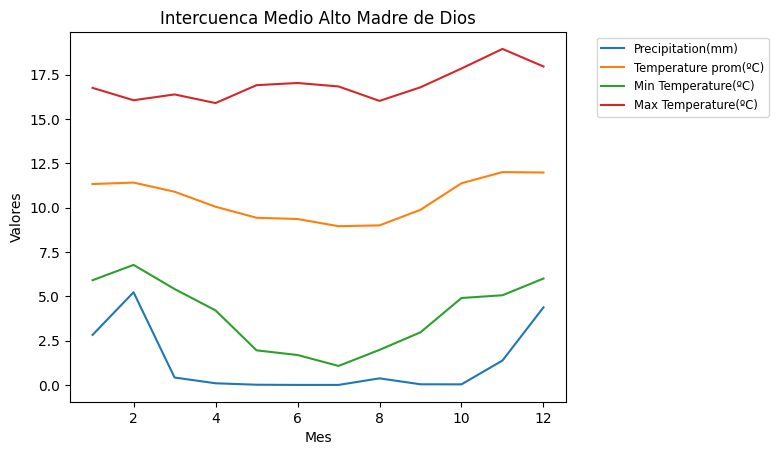

In [ ]:
#Intercuenca Medio Alto Madre de Dios
promedio_meses=promedio_meses.sel(time=slice('1981-01-01T12:00:00.000000000','1981-12-31T12:00:00.000000000'))
PISCOt_d =promedio_meses.Prec.groupby(promedio_meses.time.dt.month)
Imagen_pp=PISCOt_d.mean(dim="time").isel(latitude=154, longitude=81).plot(label='Precipitation(mm)')

dataset_combinado=dataset_combinado.sel(time=slice('1981-01-01T12:00:00.000000000','1981-12-31T12:00:00.000000000'))
PISCOt_Tpro =dataset_combinado.Tpro.groupby(dataset_combinado.time.dt.month)
Imagen_Tpro=PISCOt_Tpro.mean(dim="time").isel(latitude=154, longitude=81).plot(label='Temperature prom(ºC)')

pisco_tm_mensual=pisco_tm_mensual.sel(time=slice('1981-01-01T12:00:00.000000000','1981-12-31T12:00:00.000000000'))
pisco_tm_mensual =pisco_tm_mensual.tn.groupby(pisco_tm_mensual.time.dt.month)
Imagen_Tn=pisco_tm_mensual.mean(dim="time").isel(latitude=154, longitude=81).plot(label='Min Temperature(ºC)')

promedio_tx_mensual=promedio_tx_mensual.sel(time=slice('1981-01-01T12:00:00.000000000','1981-12-31T12:00:00.000000000'))
PISCOt_Tx =promedio_tx_mensual.tx.groupby(promedio_tx_mensual.time.dt.month)
Imagen_Tx=PISCOt_Tx.mean(dim="time").isel(latitude=154, longitude=81).plot(label='Max Temperature(ºC)')

plt.xlabel('Mes')
plt.ylabel('Valores')
plt.title('Intercuenca Medio Alto Madre de Dios')
plt.legend(fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left')

In [ ]:
#Determinamos las demas variables las cuales son: IDHA , ISDHA y BHE
#Cuenca de Camanà
promedio_meses=promedio_meses.sel(time=slice('1981-01-01T12:00:00.000000000','1981-12-31T12:00:00.000000000'))
Precipitacion_2= np.sqrt(promedio_meses.Prec.sel(longitude=-72.25, latitude=-16.85, method="nearest")*12)
dataset_combinado=dataset_combinado.sel(time=slice('1981-01-01T12:00:00.000000000','1981-12-31T12:00:00.000000000'))
Temperatura_prom_2=np.sqrt(dataset_combinado.Tpro.sel(longitude=-72.25, latitude=-16.85, method="nearest")+10)
IM_cam= Precipitacion_2/Temperatura_prom_2
IM_cam

<xarray.DataArray (time: 12)>
array([0.03502269, 0.01385747, 0.05189784, 0.01767971, 0.01192082,
       0.03002298, 0.02757828, 0.13437521, 0.10606516, 0.04875904,
       0.08685828, 0.02082222], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1981-01-31 1981-02-28 ... 1981-12-31

In [ ]:
IDHA_cam = IM_cam * 0.193
ISHA_cam = 10 - IDHA_cam
BHE_cam = ISHA_cam - IDHA_cam
BHE_cam

<xarray.DataArray (time: 12)>
array([9.986481 , 9.994652 , 9.979967 , 9.9931755, 9.995399 , 9.988411 ,
       9.989355 , 9.948132 , 9.959059 , 9.981178 , 9.966473 , 9.991962 ],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1981-01-31 1981-02-28 ... 1981-12-31

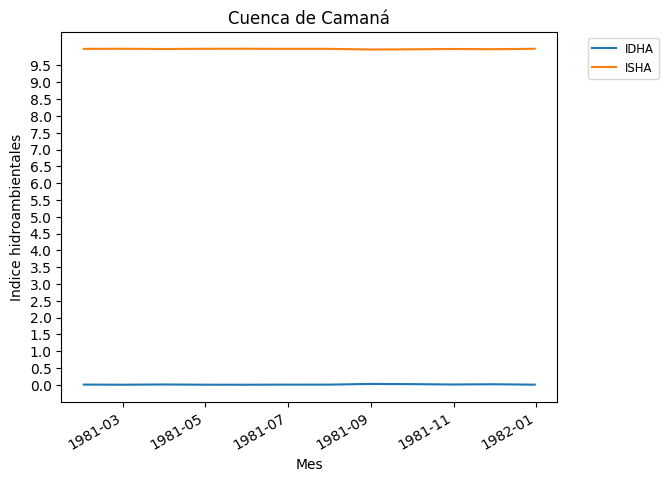

In [ ]:
#Graficas de Cuenca de Camaná
IDHA_cam.plot(label='IDHA')
ISHA_cam.plot(label='ISHA')
plt.yticks([i * 0.5 for i in range(int(max(max(IDHA_cam), max(ISHA_cam)) * 2) + 1)])
plt.xlabel('Mes')
plt.ylabel('Indice hidroambientales')
plt.title('Cuenca de Camaná')
plt.legend(fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left')

In [ ]:
#Modificacion de IDHA de Cuenca de Camaná
promedio_meses=promedio_meses.sel(time=slice('1981-01-01T12:00:00.000000000','1981-12-31T12:00:00.000000000'))
Precipitacion_1= np.sqrt(promedio_meses.Prec.sel(longitude=-72.25, latitude=-16.85, method="nearest")*12)
dataset_combinado=dataset_combinado.sel(time=slice('1981-01-01T12:00:00.000000000','1981-12-31T12:00:00.000000000'))
Temperatura_prom_1=np.sqrt(dataset_combinado.Tpro.sel(longitude=-72.25, latitude=-16.85, method="nearest")+10)
IM_cam= Precipitacion_1/Temperatura_prom_1
IDHA_cam = IM_cam * 0.193

promedio_meses=promedio_meses.sel(time=slice('1981-01-01T12:00:00.000000000','1981-12-31T12:00:00.000000000'))
Precipitacion_1_5= np.sqrt(promedio_meses.Prec.sel(longitude=-72.25, latitude=-16.85, method="nearest")*12)
dataset_combinado=dataset_combinado.sel(time=slice('1981-01-01T12:00:00.000000000','1981-12-31T12:00:00.000000000'))
Temperatura_prom_1_5=np.sqrt(dataset_combinado.Tpro.sel(longitude=-72.25, latitude=-16.85, method="nearest")+11.5)
IM_cam_1_5= Precipitacion_1_5/Temperatura_prom_1_5
IDHA_cam_1_5 = IM_cam_1_5 * 0.193

promedio_meses=promedio_meses.sel(time=slice('1981-01-01T12:00:00.000000000','1981-12-31T12:00:00.000000000'))
Precipitacion_3= np.sqrt(promedio_meses.Prec.sel(longitude=-72.25, latitude=-16.85, method="nearest")*12)
dataset_combinado=dataset_combinado.sel(time=slice('1981-01-01T12:00:00.000000000','1981-12-31T12:00:00.000000000'))
Temperatura_prom_3=np.sqrt(dataset_combinado.Tpro.sel(longitude=-72.25, latitude=-16.85, method="nearest")+13)
IM_cam_3=Precipitacion_3/Temperatura_prom_3
IDHA_cam_3 = IM_cam_3 * 0.193

promedio_meses=promedio_meses.sel(time=slice('1981-01-01T12:00:00.000000000','1981-12-31T12:00:00.000000000'))
Precipitacion_menos= np.sqrt(promedio_meses.Prec.sel(longitude=-72.25, latitude=-16.85, method="nearest")*12)* 0.7
dataset_combinado=dataset_combinado.sel(time=slice('1981-01-01T12:00:00.000000000','1981-12-31T12:00:00.000000000'))
Temperatura_prom_1=np.sqrt(dataset_combinado.Tpro.sel(longitude=-72.25, latitude=-16.85, method="nearest")+10)
IM_cam_menos= Precipitacion_menos/Temperatura_prom_1
IDHA_cam_menos = IM_cam_menos * 0.193

promedio_meses=promedio_meses.sel(time=slice('1981-01-01T12:00:00.000000000','1981-12-31T12:00:00.000000000'))
Precipitacion_menos= np.sqrt(promedio_meses.Prec.sel(longitude=-72.25, latitude=-16.85, method="nearest")*12)* 0.7
dataset_combinado=dataset_combinado.sel(time=slice('1981-01-01T12:00:00.000000000','1981-12-31T12:00:00.000000000'))
Temperatura_prom_menos_1_5=np.sqrt(dataset_combinado.Tpro.sel(longitude=-72.25, latitude=-16.85, method="nearest")+11.5)
IM_cam_menos_1_5= Precipitacion_menos/Temperatura_prom_menos_1_5
IDHA_cam_menos_1_5 = IM_cam_menos_1_5 * 0.193

promedio_meses=promedio_meses.sel(time=slice('1981-01-01T12:00:00.000000000','1981-12-31T12:00:00.000000000'))
Precipitacion_menos= np.sqrt(promedio_meses.Prec.sel(longitude=-72.25, latitude=-16.85, method="nearest")*12)* 0.7
dataset_combinado=dataset_combinado.sel(time=slice('1981-01-01T12:00:00.000000000','1981-12-31T12:00:00.000000000'))
Temperatura_prom_menos_3=np.sqrt(dataset_combinado.Tpro.sel(longitude=-72.25, latitude=-16.85, method="nearest")+13)
IM_cam_menos_3= Precipitacion_menos/Temperatura_prom_menos_3
IDHA_cam_menos_3 = IM_cam_menos_3 * 0.193

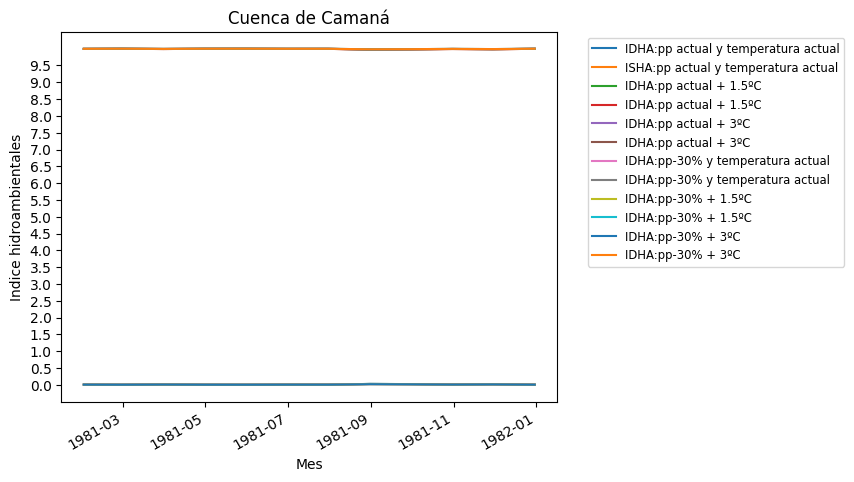

In [ ]:
IDHA_cam = IM_cam * 0.193
ISHA_cam = 10 - IDHA_cam

IDHA_cam_1_5 = IM_cam_1_5 * 0.193
ISHA_cam_1_5 = 10 - IDHA_cam_1_5

IDHA_cam_3 = IM_cam_3 * 0.193
ISHA_cam_3 = 10 - IDHA_cam_3

IDHA_cam_menos = IM_cam_menos * 0.193
ISHA_cam_menos = 10 - IDHA_cam_menos

IDHA_cam_menos_1_5 = IM_cam_menos_1_5 * 0.193
ISHA_cam_menos_1_5 = 10 - IDHA_cam_menos_1_5

IDHA_cam_menos_3 = IM_cam_menos_3 * 0.193
ISHA_cam_menos_3 = 10 - IDHA_cam_menos_3

#Graficaremos
IDHA_cam.plot(label='IDHA:pp actual y temperatura actual')
ISHA_cam.plot(label='ISHA:pp actual y temperatura actual')

IDHA_cam_1_5.plot(label='IDHA:pp actual + 1.5ºC')
ISHA_cam_1_5.plot(label='IDHA:pp actual + 1.5ºC')

IDHA_cam_3.plot(label='IDHA:pp actual + 3ºC')
ISHA_cam_3.plot(label='IDHA:pp actual + 3ºC')

IDHA_cam_menos.plot(label='IDHA:pp-30% y temperatura actual')
ISHA_cam_menos.plot(label='IDHA:pp-30% y temperatura actual')

IDHA_cam_menos_1_5.plot(label='IDHA:pp-30% + 1.5ºC')
ISHA_cam_menos_1_5.plot(label='IDHA:pp-30% + 1.5ºC')

IDHA_cam_menos_3.plot(label='IDHA:pp-30% + 3ºC')
ISHA_cam_menos_3.plot(label='IDHA:pp-30% + 3ºC')

plt.yticks([i * 0.5 for i in range(int(max(max(IDHA_cam), max(ISHA_cam)) * 2) + 1)])
plt.xlabel('Mes')
plt.ylabel('Indice hidroambientales')
plt.title('Cuenca de Camaná')
plt.legend(fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left')

In [ ]:
#Determinamos las demas variables las cuales son: IDHA , ISDHA y BHE
#Intercuenca Medio Alto Madre de Dios
promedio_meses=promedio_meses.sel(time=slice('1981-01-01T12:00:00.000000000','1981-12-31T12:00:00.000000000'))
Precipitacion_1= np.sqrt(promedio_meses.Prec.sel(longitude=-73.15, latitude=-14.45, method="nearest")*12)
dataset_combinado=dataset_combinado.sel(time=slice('1981-01-01T12:00:00.000000000','1981-12-31T12:00:00.000000000'))
Temperatura_prom_1=np.sqrt(dataset_combinado.Tpro.sel(longitude=-73.15, latitude=-14.45, method="nearest")+10)
IM_madre= Precipitacion_1/Temperatura_prom_1
IM_madre


<xarray.DataArray (time: 12)>
array([1.2715504 , 1.7367254 , 0.4936918 , 0.23833844, 0.08556322,
       0.02174845, 0.02690139, 0.48250246, 0.1492826 , 0.13837554,
       0.87398195, 1.5546094 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1981-01-31 1981-02-28 ... 1981-12-31

In [ ]:
IDHA_madre = IM_madre * 0.193
ISHA_madre = 10 - IDHA_madre
BHE_madre = ISHA_madre - IDHA_madre
BHE_madre

<xarray.DataArray (time: 12)>
array([9.509182, 9.329624, 9.809435, 9.908001, 9.966972, 9.991606,
       9.989616, 9.813753, 9.942377, 9.946587, 9.662643, 9.399921],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1981-01-31 1981-02-28 ... 1981-12-31

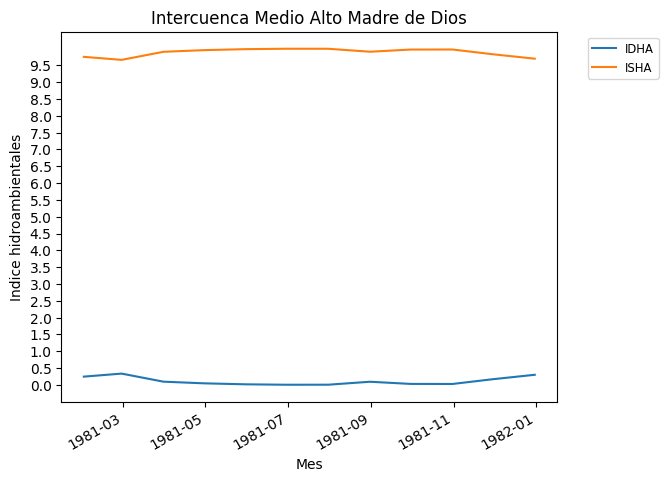

In [ ]:
# Graficas de Intercuenca Medio Alto Madre de Dios
IDHA_madre.plot(label='IDHA')
ISHA_madre.plot(label='ISHA')
plt.yticks([i * 0.5 for i in range(int(max(max(IDHA_madre), max(ISHA_madre)) * 2) + 1)])
plt.xlabel('Mes')
plt.ylabel('Indice hidroambientales')
plt.title('Intercuenca Medio Alto Madre de Dios')
plt.legend(fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left')

In [ ]:
#Modificacion de IDHA de Intercuenca Medio Alto Madre de Dios
promedio_meses=promedio_meses.sel(time=slice('1981-01-01T12:00:00.000000000','1981-12-31T12:00:00.000000000'))
Precipitacion_1= np.sqrt(promedio_meses.Prec.sel(longitude=-73.15, latitude=-14.45, method="nearest")*12)
dataset_combinado=dataset_combinado.sel(time=slice('1981-01-01T12:00:00.000000000','1981-12-31T12:00:00.000000000'))
Temperatura_prom_1=np.sqrt(dataset_combinado.Tpro.sel(longitude=-73.15, latitude=-14.45, method="nearest")+10)
IM_madre= Precipitacion_1/Temperatura_prom_1
IDHA_madre = IM_madre * 0.193

promedio_meses=promedio_meses.sel(time=slice('1981-01-01T12:00:00.000000000','1981-12-31T12:00:00.000000000'))
Precipitacion_1_5= np.sqrt(promedio_meses.Prec.sel(longitude=-73.15, latitude=-14.45, method="nearest")*12)
dataset_combinado=dataset_combinado.sel(time=slice('1981-01-01T12:00:00.000000000','1981-12-31T12:00:00.000000000'))
Temperatura_prom_1_5=np.sqrt(dataset_combinado.Tpro.sel(longitude=-73.15, latitude=-14.45, method="nearest")+11.5)
IM_madre_1_5= Precipitacion_1_5/Temperatura_prom_1_5
IDHA_madre_1_5 = IM_madre_1_5 * 0.193

promedio_meses=promedio_meses.sel(time=slice('1981-01-01T12:00:00.000000000','1981-12-31T12:00:00.000000000'))
Precipitacion_3= np.sqrt(promedio_meses.Prec.sel(longitude=-73.15, latitude=-14.45, method="nearest")*12)
dataset_combinado=dataset_combinado.sel(time=slice('1981-01-01T12:00:00.000000000','1981-12-31T12:00:00.000000000'))
Temperatura_prom_3=np.sqrt(dataset_combinado.Tpro.sel(longitude=-73.15, latitude=-14.45, method="nearest")+13)
IM_madre_3=Precipitacion_3/Temperatura_prom_3
IDHA_madre_3 = IM_madre_3 * 0.193

promedio_meses=promedio_meses.sel(time=slice('1981-01-01T12:00:00.000000000','1981-12-31T12:00:00.000000000'))
Precipitacion_menos= np.sqrt(promedio_meses.Prec.sel(longitude=-73.15, latitude=-14.45, method="nearest")*12)* 0.7
dataset_combinado=dataset_combinado.sel(time=slice('1981-01-01T12:00:00.000000000','1981-12-31T12:00:00.000000000'))
Temperatura_prom_1=np.sqrt(dataset_combinado.Tpro.sel(longitude=-73.15, latitude=-14.45, method="nearest")+10)
IM_madre_menos= Precipitacion_menos/Temperatura_prom_1
IDHA_madre_menos = IM_madre_menos * 0.193

promedio_meses=promedio_meses.sel(time=slice('1981-01-01T12:00:00.000000000','1981-12-31T12:00:00.000000000'))
Precipitacion_menos= np.sqrt(promedio_meses.Prec.sel(longitude=-73.15, latitude=-14.45, method="nearest")*12)* 0.7
dataset_combinado=dataset_combinado.sel(time=slice('1981-01-01T12:00:00.000000000','1981-12-31T12:00:00.000000000'))
Temperatura_prom_menos_1_5=np.sqrt(dataset_combinado.Tpro.sel(longitude=-73.15, latitude=-14.45, method="nearest")+11.5)
IM_madre_menos_1_5= Precipitacion_menos/Temperatura_prom_menos_1_5
IDHA_madre_menos_1_5 = IM_madre_menos_1_5 * 0.193

promedio_meses=promedio_meses.sel(time=slice('1981-01-01T12:00:00.000000000','1981-12-31T12:00:00.000000000'))
Precipitacion_menos= np.sqrt(promedio_meses.Prec.sel(longitude=-73.15, latitude=-14.45, method="nearest")*12)* 0.7
dataset_combinado=dataset_combinado.sel(time=slice('1981-01-01T12:00:00.000000000','1981-12-31T12:00:00.000000000'))
Temperatura_prom_menos_3=np.sqrt(dataset_combinado.Tpro.sel(longitude=-73.15, latitude=-14.45, method="nearest")+13)
IM_madre_menos_3= Precipitacion_menos/Temperatura_prom_menos_3
IDHA_madre_menos_3 = IM_madre_menos_3 * 0.193

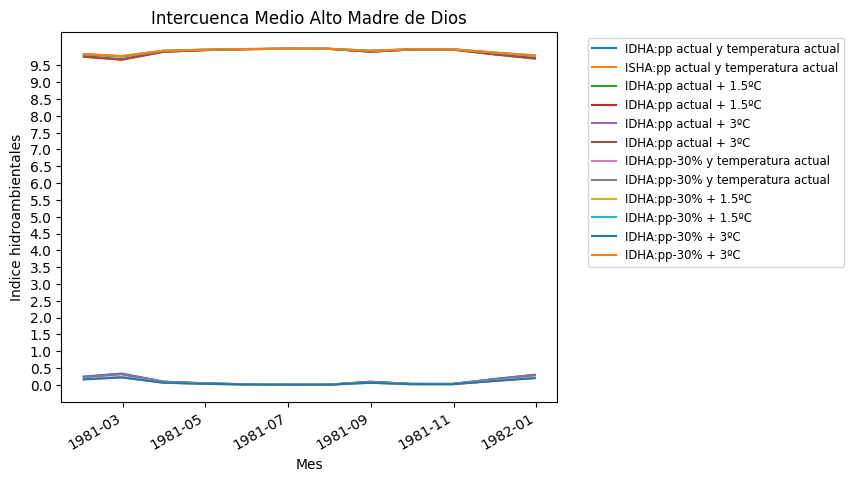

In [ ]:
#Modificacion de IDHA de Intercuenca Medio Alto Madre de Dios
IDHA_madre = IM_madre * 0.193
ISHA_madre = 10 - IDHA_madre

IDHA_madre_1_5 = IM_madre_1_5 * 0.193
ISHA_madre_1_5 = 10 - IDHA_madre_1_5

IDHA_madre_3 = IM_madre_3 * 0.193
ISHA_madre_3 = 10 - IDHA_madre_3

IDHA_madre_menos = IM_madre_menos * 0.193
ISHA_madre_menos = 10 - IDHA_madre_menos

IDHA_madre_menos_1_5 = IM_madre_menos_1_5 * 0.193
ISHA_madre_menos_1_5 = 10 - IDHA_madre_menos_1_5

IDHA_madre_menos_3 = IM_madre_menos_3 * 0.193
ISHA_madre_menos_3 = 10 - IDHA_madre_menos_3

#Graficaremos
IDHA_madre.plot(label='IDHA:pp actual y temperatura actual')
ISHA_madre.plot(label='ISHA:pp actual y temperatura actual')

IDHA_madre_1_5.plot(label='IDHA:pp actual + 1.5ºC')
ISHA_madre_1_5.plot(label='IDHA:pp actual + 1.5ºC')

IDHA_madre_3.plot(label='IDHA:pp actual + 3ºC')
ISHA_madre_3.plot(label='IDHA:pp actual + 3ºC')

IDHA_madre_menos.plot(label='IDHA:pp-30% y temperatura actual')
ISHA_madre_menos.plot(label='IDHA:pp-30% y temperatura actual')

IDHA_madre_menos_1_5.plot(label='IDHA:pp-30% + 1.5ºC')
ISHA_madre_menos_1_5.plot(label='IDHA:pp-30% + 1.5ºC')

IDHA_madre_menos_3.plot(label='IDHA:pp-30% + 3ºC')
ISHA_madre_menos_3.plot(label='IDHA:pp-30% + 3ºC')

plt.yticks([i * 0.5 for i in range(int(max(max(IDHA_madre), max(ISHA_madre)) * 2) + 1)])
plt.xlabel('Mes')
plt.ylabel('Indice hidroambientales')
plt.title('Intercuenca Medio Alto Madre de Dios')
plt.legend(fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left')

In [ ]:
BHE_madre.plot(label='IDHA:pp actual y temperatura actual')
BHE_cam.plot(label='IDHA:pp actual y temperatura actual')
plt.yticks([i * 0.5 for i in range(int(max(max(IDHA_madre), max(ISHA_madre)) * 2) + 1)])
plt.xlabel('Mes')
plt.ylabel('Indice hidroambientales')
plt.title('Intercuenca Medio Alto Madre de Dios')
plt.legend(fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left')